In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from sklearn.model_selection import train_test_split
df = pd.read_csv('data.csv')
df.head()

,Aircraft,Type Of Traveller,Seat Type,Route,Date Flown,Seat Comfort,Cabin Staff Service,Food & Beverages,Inflight Entertainment,Ground Service,Wifi & Connectivity,Value For Money,Recommended
0,Boeing 787-9,Business,Economy Class,Denver to London,December 2022,1.0,1.0,1.0,3.0,1.0,NaN,1,no
1,A320,Solo Leisure,Business Class,London to Marrakech,June 2022,3.0,5.0,5.0,NaN,4.0,NaN,3,yes
2,A380,Solo Leisure,Economy Class,San Francisco to London,November 2022,2.0,1.0,2.0,2.0,3.0,1.0,2,no
3,A320,Solo Leisure,Business Class,London to Lisbon,November 2022,3.0,4.0,4.0,NaN,3.0,NaN,3,yes
4,Boeing 787 / A320,Solo Leisure,Economy Class,Montreal to Edinburgh via London Heathrow,January 2022,4.0,4.0,4.0,4.0,4.0,NaN,4,yes


In [8]:
df.shape

(3427, 13)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3427 entries, 0 to 3426
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Aircraft                1790 non-null   object 
 1   Type Of Traveller       2657 non-null   object 
 2   Seat Type               3425 non-null   object 
 3   Route                   2653 non-null   object 
 4   Date Flown              2649 non-null   object 
 5   Seat Comfort            3329 non-null   float64
 6   Cabin Staff Service     3322 non-null   float64
 7   Food & Beverages        3097 non-null   float64
 8   Inflight Entertainment  2415 non-null   float64
 9   Ground Service          2591 non-null   float64
 10  Wifi & Connectivity     506 non-null    float64
 11  Value For Money         3427 non-null   int64  
 12  Recommended             3427 non-null   object 
dtypes: float64(6), int64(1), object(6)
memory usage: 348.2+ KB


In [11]:
df.isnull().sum()

Aircraft                  1637
Type Of Traveller          770
Seat Type                    2
Route                      774
Date Flown                 778
Seat Comfort                98
Cabin Staff Service        105
Food & Beverages           330
Inflight Entertainment    1012
Ground Service             836
Wifi & Connectivity       2921
Value For Money              0
Recommended                  0
dtype: int64

In [13]:
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)
df.columns = df.columns.str.strip()
df['Date Flown'] = pd.to_datetime(df['Date Flown'])
df['Recommended'] = df['Recommended'].apply(lambda x: True if x == 'yes' else False)
df.reset_index(drop=True, inplace=True)
print(df.head())

        Aircraft Type Of Traveller       Seat Type  \
0           A380      Solo Leisure   Economy Class   
1     Boeing 777      Solo Leisure  Business Class   
2      A350-1000      Solo Leisure  Business Class   
3  Boeing 787-10    Couple Leisure  Business Class   
4           A380    Couple Leisure   Economy Class   

                        Route Date Flown  Seat Comfort  Cabin Staff Service  \
0     San Francisco to London 2022-11-01           2.0                  1.0   
1  London Heathrow to Nairobi 2022-10-01           3.0                  1.0   
2       London to Los Angeles 2022-10-01           5.0                  4.0   
3           Atlanta to London 2022-10-01           5.0                  4.0   
4     London to San Francisco 2022-10-01           1.0                  1.0   

   Food & Beverages  Inflight Entertainment  Ground Service  \
0               2.0                     2.0             3.0   
1               1.0                     2.0             1.0   
2          

In [14]:
df.isnull().sum()

Aircraft                  0
Type Of Traveller         0
Seat Type                 0
Route                     0
Date Flown                0
Seat Comfort              0
Cabin Staff Service       0
Food & Beverages          0
Inflight Entertainment    0
Ground Service            0
Wifi & Connectivity       0
Value For Money           0
Recommended               0
dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [25]:
X = df[['Seat Comfort', 'Cabin Staff Service', 'Food & Beverages', 'Inflight Entertainment', 
       'Ground Service', 'Wifi & Connectivity', 'Value For Money']]  # Input features
y = df['Recommended']  # Target variable

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Confusion Matrix:\n", confusion)

Accuracy: 100.00%
Confusion Matrix:
 [[58]]


In [30]:
!pip install wordcloud
!pip install textblob


     ------------------------------------ 153.1/153.1 kB 338.4 kB/s eta 0:00:00
     ------------------------------------ 636.8/636.8 kB 507.7 kB/s eta 0:00:00


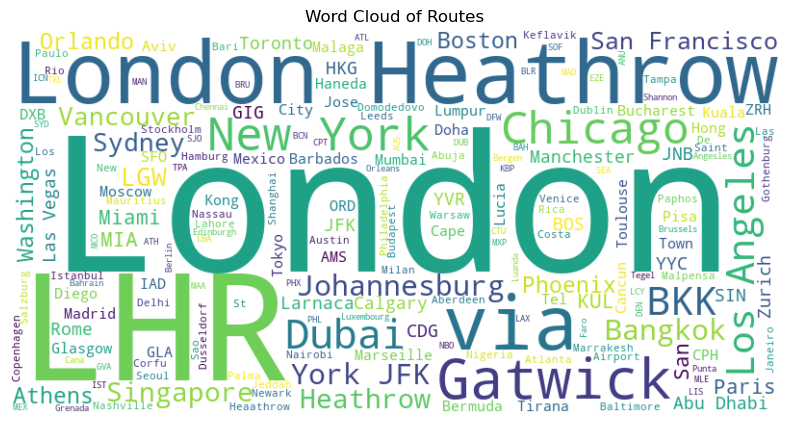

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all routes into a single string
all_routes = ' '.join(df['Route'].dropna())

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_routes)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Routes')
plt.show()

In [37]:
from textblob import TextBlob

# Replace "Text" with the relevant column name that contains the text data for sentiment analysis
column_name = "Route"

# Perform sentiment analysis on the specified column
df['Sentiment_Polarity'] = df[column_name].apply(lambda x: TextBlob(x).sentiment.polarity)
df['Sentiment_Subjectivity'] = df[column_name].apply(lambda x: TextBlob(x).sentiment.subjectivity)

# Print the sentiment analysis results
print("Sentiment Analysis Results:")
print(df[[column_name, 'Sentiment_Polarity', 'Sentiment_Subjectivity']].head())

Sentiment Analysis Results:
                        Route  Sentiment_Polarity  Sentiment_Subjectivity
0     San Francisco to London                 0.0                     0.0
1  London Heathrow to Nairobi                 0.0                     0.0
2       London to Los Angeles                 0.0                     0.0
3           Atlanta to London                 0.0                     0.0
4     London to San Francisco                 0.0                     0.0
